# Plot voltage components

In a 1D model, the voltage of a cell is given by the difference in solid-phase potentials at the two edges of the domain

$$
V = \left.\phi_\mathrm{s,p}\right\rvert_{x=L}
    - \left.\phi_\mathrm{s,n}\right\rvert_{x=0}
$$

We can decompose this voltage into constituent components by adding and subtracting terms and regrouping:

$$
\begin{align*}
V =& \left(\left.\phi_\mathrm{s,p}\right\rvert_{x=L} - \bar{\phi}_\mathrm{s,p}\right)
&\quad&\text{Positive solid phase ohmic losses} 
\\
&- \left(\left.\phi_\mathrm{s,n}\right\rvert_{x=L} - \bar{\phi}_\mathrm{s,n}\right) 
&&\text{Negative solid phase ohmic losses} 
\\
&+ \bar{\eta}_\mathrm{p}
&&\text{Positive reaction overpotential} 
\\
&- \bar{\eta}_\mathrm{n}
&&\text{Negative reaction overpotential} 
\\
&+ \left(\bar{\phi}_\mathrm{e,p}-\bar{\phi}_\mathrm{e,n}\right)
&&\text{Electrolyte overpotential}
\\
&+ \left(\overline{U(c_\mathrm{p}^\mathrm{surf})}-U(\bar{c}_\mathrm{p})\right)
&&\text{Positive particle overpotential}
\\
&- \left(\overline{U(c_\mathrm{n}^\mathrm{surf})}-U(\bar{c}_\mathrm{n})\right)
&&\text{Negative particle overpotential}
\\
&+ U(\bar{c}_\mathrm{p})
&&\text{Positive bulk open-circuit potential}
\\
&- U(\bar{c}_\mathrm{n})
&&\text{Negative bulk open-circuit potential}
\end{align*}
$$

where 

$$
\eta = \phi_\mathrm{s} - \phi_\mathrm{e} - U(c^\mathrm{surf})
$$

and $\bar{\cdot}$ represents the average value of the variable over its subdomain.

To demonstrate this, we solve a standard DFN model with the Chen2020 parameter set and plot the various potentials

In [1]:
%pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
import pybamm

model = pybamm.lithium_ion.DFN()

experiment = pybamm.Experiment(["Discharge at 1C until 2.5 V"])

sim = pybamm.Simulation(
    model, experiment=experiment, parameter_values=pybamm.ParameterValues("Chen2020")
)
sol = sim.solve()

sol.plot(
    [
        "Negative electrode bulk open-circuit potential [V]",
        "Positive electrode bulk open-circuit potential [V]",
        "Negative particle concentration overpotential [V]",
        "Positive particle concentration overpotential [V]",
        "X-averaged negative electrode reaction overpotential [V]",
        "X-averaged positive electrode reaction overpotential [V]",
        "X-averaged concentration overpotential [V]",
        "X-averaged electrolyte ohmic losses [V]",
        "X-averaged negative electrode ohmic losses [V]",
        "X-averaged positive electrode ohmic losses [V]",
    ],
)

Note: you may need to restart the kernel to use updated packages.


At t = 472.93 and h = 9.61226e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 232.93 and h = 1.25789e-14, the corrector convergence failed repeatedly or with |h| = hmin.


interactive(children=(FloatSlider(value=0.0, description='t', max=3555.447923723904, step=35.554479237239036),…

A more useful visualization is given by the `plot_voltage_components` function, which can either plot all the individual voltage components

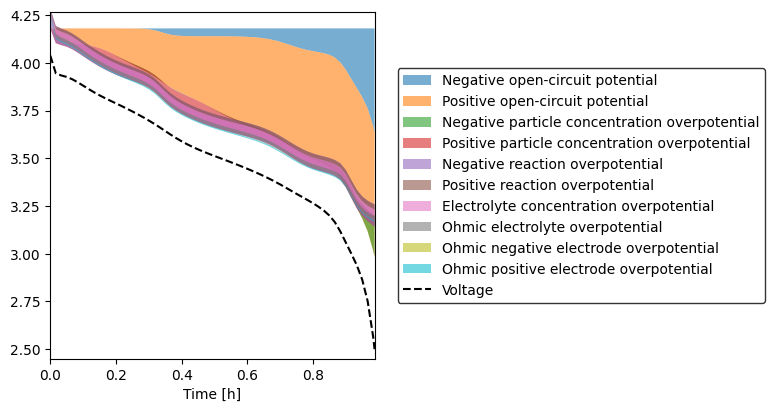

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [2]:
sol.plot_voltage_components(split_by_electrode=True)

or group positive and negative together

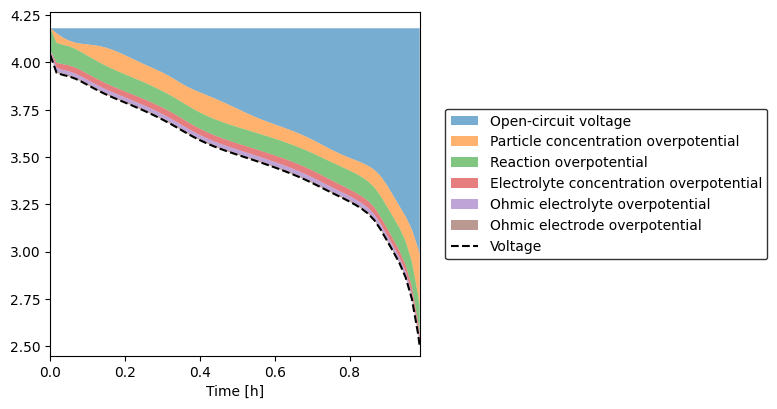

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [3]:
sol.plot_voltage_components()

Note that this function further splits the electrolyte overpotential into the contribution from the electrolyte gradient and the contribution from ohmic losses

## References

The relevant papers for this notebook are:

In [4]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Von DAG Bruggeman. Berechnung verschiedener physikalischer konstanten von heterogenen substanzen. i. dielektrizitätskonstanten und leitfähigkeiten der mischkörper aus isotropen substanzen. Annalen der physik, 416(7):636–664, 1935.
[3] Chang-Hui Chen, Ferran Brosa Planella, Kieran O'Regan, Dominika Gastol, W. Dhammika Widanage, and Emma Kendrick. Development of Experimental Techniques for Parameterization of Multi-scale Lithium-ion Battery Models. Journal of The Electrochemical Society, 167(8):080534, 2020. doi:10.1149/1945-7111/ab9050.
[4] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. 

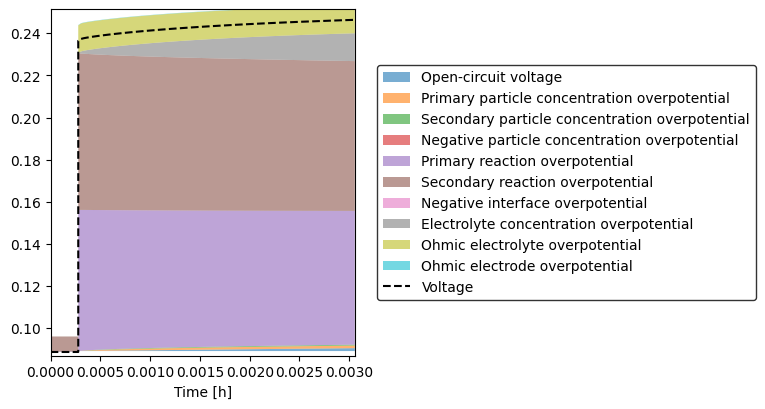

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [51]:
model = pybamm.lithium_ion.DFN({'working electrode': 'positive', 'particle phases': ('1','2'), 'open-circuit potential': ('single',('single','Wycisk'))})

parameter_values = pybamm.ParameterValues("Ecker2015")
negative_Li_counter_params = {param:value for param, value in parameter_values.items() if ('Negative' in param or 'negative' in param or 'lithium metal' in param)}
negative_Li_counter_params.update({"Exchange-current density for lithium metal electrode [A.m-2]": 1e20,
            "Typical plated lithium concentration [mol.m-3]": 77391.0,
            "Lower voltage cut-off [V]": 0,
            "Upper voltage cut-off [V]": 2,
                })

parameter_values = pybamm.ParameterValues("Chen2020_composite")
lithiation_ocp = parameter_values['Secondary: Negative electrode lithiation OCP [V]']
de_lithiation_ocp = parameter_values['Secondary: Negative electrode delithiation OCP [V]']

new_params = dict()
old_params = dict(parameter_values)
for param, values in parameter_values.items():
    if "Negative" in param:
        new_params[param.replace("Negative", "Positive")] = old_params[param]
    elif "negative" in param:
        new_params[param.replace("negative", "positive")] = old_params[param]
    elif "Positive" in param or 'positive' in param:
        continue
    else:
        new_params[param] = parameter_values[param]

new_params.update({'Secondary: Positive particle hysteresis decay rate': 0.005,
                         'Secondary: Positive particle hysteresis switching factor': 0.5,
                         'Secondary: Initial hysteresis state in positive electrode': 0.5})

def avg_ocp(sto):
    return (lithiation_ocp(sto) + de_lithiation_ocp(sto))/2
new_params.update({'Secondary: Positive electrode OCP [V]': avg_ocp})

new_params.update(negative_Li_counter_params)

parameter_values = pybamm.ParameterValues(new_params)

experiment = pybamm.Experiment(["Rest for 1 second", "Charge at 1C for 10 seconds (0.1s period)"])

sim = pybamm.Simulation(
    model, experiment=experiment, parameter_values=parameter_values
)
sol = sim.solve()

sol.plot_voltage_components()